In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-selling-price/predict-the-price-5-fe7f8735/7b9447c625cf11eb.zip

--2020-12-04 13:44:52--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-predict-selling-price/predict-the-price-5-fe7f8735/7b9447c625cf11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.124
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428817 (419K) [application/zip]
Saving to: ‘7b9447c625cf11eb.zip’

7b9447c625cf11eb.zi 100%[===================>] 418.77K   528KB/s    in 0.8s    

2020-12-04 13:44:54 (528 KB/s) - ‘7b9447c625cf11eb.zip’ saved [428817/428817]



In [ ]:
!unzip 7b9447c625cf11eb.zip

Archive:  7b9447c625cf11eb.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
re=test['Product_id']

In [ ]:
train.head(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
4,SHOE4FZGGTE7HJXN,33.0,2014-12-08 12:25:52.000,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992


In [ ]:
test.head(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Product_id            0
 Stall_no              0
 instock_date          0
 Market_Category       0
 Customer_name       189
 Loyalty_customer      0
 Product_Category      0
 Grade                 0
 Demand                0
 Discount_avail        0
 charges_1             0
 charges_2 (%)         0
 Minimum_price         0
 Maximum_price         0
 Selling_Price         0
 dtype: int64, Product_id           0
 Stall_no             0
 instock_date         0
 Market_Category      0
 Customer_name       53
 Loyalty_customer     0
 Product_Category     0
 Grade                0
 Demand               0
 Discount_avail       0
 charges_1            0
 charges_2 (%)        0
 Minimum_price        0
 Maximum_price        0
 dtype: int64, (5576, 15), (3430, 14), Product_id           object
 Stall_no            float64
 instock_date         object
 Market_Category       int64
 Customer_name        object
 Loyalty_customer     object
 Product_Category     object
 Grade                 int64
 Dema

In [ ]:
## Check outliers
#test.iloc[:,:].plot(kind='box',figsize=(50,100), subplots=True,grid=False, layout=(12, 4))
## Except metal fatigue, all are having outliers free, while selecting machine learning algorithm this should be taken into consideration

In [ ]:
#train.drop_duplicates(keep=False, inplace=True)
train['Selling_Price']=abs(train['Selling_Price'])

In [ ]:
train.corr().sort_values("Selling_Price", axis = 0, ascending = False)

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Selling_Price,0.010454,0.140552,0.085598,-0.001432,-0.519173,0.053465,0.009202,0.705414,0.773181,1.000000
Maximum_price,0.008443,0.134257,0.164350,0.003987,-0.003918,0.012169,0.009816,0.708038,1.000000,0.773181
Minimum_price,0.000123,0.194787,-0.079583,0.010283,0.009817,0.019448,0.005448,1.000000,0.708038,0.705414
Market_Category,-0.006145,1.000000,-0.036346,-0.018800,-0.003306,0.019009,0.024154,0.194787,0.134257,0.140552
Grade,-0.003449,-0.036346,1.000000,0.010107,-0.025232,-0.025316,-0.016644,-0.079583,0.164350,0.085598
charges_1,-0.010224,0.019009,-0.025316,-0.007370,-0.003899,1.000000,0.270625,0.019448,0.012169,0.053465
Stall_no,1.000000,-0.006145,-0.003449,0.004302,-0.019656,-0.010224,-0.004745,0.000123,0.008443,0.010454
charges_2 (%),-0.004745,0.024154,-0.016644,0.017653,0.018905,0.270625,1.000000,0.005448,0.009816,0.009202
Demand,0.004302,-0.018800,0.010107,1.000000,0.010230,-0.007370,0.017653,0.010283,0.003987,-0.001432
Discount_avail,-0.019656,-0.003306,-0.025232,0.010230,1.000000,-0.003899,0.018905,0.009817,-0.003918,-0.519173


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Stall_no,6363.0,25.309445,14.328980,1.0,13.000000,25.000000,37.000000,50.000000
Market_Category,6368.0,199.340609,170.275570,0.0,55.000000,132.000000,403.000000,471.000000
Grade,6368.0,0.643687,1.025092,0.0,0.000000,0.000000,2.000000,3.000000
Demand,6368.0,50.921168,29.091922,1.0,26.000000,51.000000,76.000000,100.000000
Discount_avail,6330.0,0.140442,0.347473,0.0,0.000000,0.000000,0.000000,1.000000
charges_1,6170.0,264.514100,124.483056,100.0,163.000000,252.000000,314.000000,649.000000
charges_2 (%),6163.0,10.146195,4.318339,1.0,7.000000,10.000000,14.000000,17.000000
Minimum_price,6330.0,3531.349763,2194.729604,1.0,1879.250000,3157.500000,4697.000000,17580.000000
Maximum_price,6025.0,6432.545892,3716.177364,404.0,3918.000000,5634.000000,8126.000000,58812.000000
Selling_Price,6327.0,4580.406478,2952.640478,4.0,2461.805312,4215.972992,6167.643252,22638.325941


In [ ]:
#train['Selling_Price']=train['Selling_Price'].fillna(train['Selling_Price'].mean())
train=train.dropna(subset=['Selling_Price'])

In [ ]:
df=pd.concat([train,test])

In [ ]:
df.nunique(), df.isnull().sum(),df.dtypes

(Product_id                 9798
 Stall_no                     50
 Market_Category             275
 Customer_name              8960
 Loyalty_customer              2
 Product_Category             10
 Grade                         4
 Demand                      100
 Discount_avail                2
 charges_1                   494
 charges_2 (%)                17
 Minimum_price              5381
 Maximum_price              6328
 Selling_Price              6321
 Avg_Price                  7447
 Avg_Demand                 9671
 charge_extra               9297
 total_charge               9511
 main_price                 9761
 quality_rate                241
 instock_date_year             3
 instock_date_day             31
 instock_date_weekofyear      46
 instock_date_month           11
 instock_date_dayofweek        7
 instock_date_weekend          2
 instock_date_hour            24
 instock_date_minute          60
 prime_member                  3
 dtype: int64, Product_id                  

In [ ]:
df['Stall_no']=df['Stall_no'].fillna(df['Stall_no'].mean())

In [ ]:
df['Customer_name']=df['Customer_name'].fillna('Private_Name')

In [ ]:
df['Discount_avail']=df['Discount_avail'].fillna(method='bfill')

In [ ]:
df['charges_1']=df['charges_1'].fillna(df['charges_1'].mean())
df['charges_2 (%)']=df['charges_2 (%)'].fillna(df['charges_2 (%)'].mean())

In [ ]:
df['Minimum_price']=df['Minimum_price'].fillna(df['Minimum_price'].mean())
df['Maximum_price']=df['Maximum_price'].fillna(df['Maximum_price'].mean())

In [ ]:
###
df['Avg_Price']=(df['Maximum_price']+df['Minimum_price'])/2
df['Avg_Demand']=(df['Avg_Price']*df['Demand'])/100
df['charge_extra']=(df['Avg_Price']*(df['charges_2 (%)']))/100
#df['avgg_charges_1']=df['Avg_Price']-df['charges_1']
df['total_charge']=df['charges_1']+df['charge_extra']
df['main_price']=df['Avg_Price']-df['total_charge']
df['Grade']=df['Grade']+1
df['quality_rate']=df['Grade']*df['Demand']

In [ ]:
df['7price']=df['Minimum_price']*0.7+df['Minimum_price']*0.3
df['3price']=df['Minimum_price']*0.3+df['Minimum_price']*0.7

In [ ]:
df.tail(5)

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Avg_Price,Avg_Demand,charge_extra,total_charge,main_price,quality_rate,instock_date_year,instock_date_day,instock_date_weekofyear,instock_date_month,instock_date_dayofweek,instock_date_weekend,instock_date_hour,instock_date_minute,prime_member
3425,597,9.0,58,2389,1,7,1,39,0.0,117.0,5.0,3094.0,4674.0,NaN,3884.0,1514.760,194.20,311.20,3572.80,39,2015,15,33,8,5,1,21,17,1.0
3426,7053,30.0,358,5972,1,9,4,17,0.0,509.0,6.0,3384.0,14105.0,NaN,8744.5,1486.565,524.67,1033.67,7710.83,68,2015,4,49,12,4,0,1,51,1.0
3427,9172,14.0,106,3486,1,2,1,36,0.0,150.0,17.0,710.0,10894.0,NaN,5802.0,2088.720,986.34,1136.34,4665.66,36,2016,28,13,3,0,0,20,55,1.0
3428,5677,1.0,104,163,1,0,1,63,0.0,325.0,15.0,1477.0,5165.0,NaN,3321.0,2092.230,498.15,823.15,2497.85,63,2015,23,21,5,5,1,7,41,1.0
3429,6745,3.0,165,1986,0,8,1,92,1.0,228.0,9.0,5538.0,7506.0,NaN,6522.0,6000.240,586.98,814.98,5707.02,92,2015,16,33,8,6,1,22,19,1.0


In [ ]:
x=['Product_id','Customer_name','Loyalty_customer','Product_Category']
for i in x:
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

In [ ]:
k=['instock_date']
for i in k:
  df[i] = pd.to_datetime(df[i])
for i in k:
  df[i+'_'+'year'] = df[i].dt.year
  df[i+'_'+'day'] = df[i].dt.day
  df[i+'_'+'weekofyear'] = df[i].dt.weekofyear
  df[i+'_'+'month'] = df[i].dt.month
  df[i+'_'+'dayofweek'] =df[i].dt.dayofweek
  df[i+'_'+'weekend'] = (df[i].dt.weekday >=5).astype(int)
  df[i+'_'+'hour'] = df[i].dt.hour
  df[i+'_'+'minute'] = df[i].dt.minute
del df['instock_date']

In [ ]:
df['prime_member']=df['Loyalty_customer']+df['Discount_avail']

In [ ]:
temp = df.groupby(['Product_Category']).agg({'Loyalty_customer':['count'],
                                       'Grade':['count','mean'],
                                       'Stall_no':['count','mean'],
                                       'Product_Category':['count'],
                                       'Discount_avail':['count']
                                      })
temp.columns = ['_'.join(x) for x in temp.columns]
df = pd.merge(df,temp,on=['Product_Category'],how='left')

In [ ]:
#df = pd.get_dummies(df, columns=['Product_Category'#,'Grade'#,'charges_2 (%)'
#                                 ])

In [ ]:
train = df[df['Selling_Price'].isnull()==False]
test = df[df['Selling_Price'].isnull()==True]
del test['Selling_Price']

In [ ]:
#Statical Features Extracting from train and test rows after droping Inovicedate or Exctracting features
#Train
train['Std'] = train.std(axis=1).round(2)
train['quantile1'] = train.quantile(q=0.01,axis=1).round(2)
train['quantile3'] = train.quantile(q=0.25,axis=1).round(2)
train['quantile5'] = train.quantile(q=0.50,axis=1).round(2)                                              
train['Mean'] = train.mean(axis=1).round(2)
#Test
test['Std'] = test.std(axis=1).round(2)
test['quantile1'] = test.quantile(q=0.01,axis=1).round(2)
test['quantile3'] = test.quantile(q=0.25,axis=1).round(2)
test['quantile5'] = test.quantile(q=0.50,axis=1).round(2)                                              
test['Mean'] = test.mean(axis=1).round(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#Removing Outlires
from scipy.stats import zscore

z_scores = zscore(train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = train[filtered_entries]
train = new_df

In [ ]:
#I also started the checking of some skewness in dataset:
# i  try The power Transmision method to remove skevness of the dataset
train.skew(),test.skew()

(Product_id                 0.006027
 Stall_no                   0.005098
 Market_Category            0.460864
 Customer_name             -0.068953
 Loyalty_customer          -0.452863
 Product_Category          -0.029302
 Grade                      1.195235
 Demand                    -0.014547
 Discount_avail             2.080240
 charges_1                  1.119731
 charges_2 (%)             -0.135805
 Minimum_price              1.165180
 Maximum_price              1.869425
 Selling_Price              0.855574
 Avg_Price                  1.327249
 Avg_Demand                 1.535185
 charge_extra               1.908197
 total_charge               1.529141
 main_price                 1.282967
 quality_rate               1.684271
 instock_date_year          0.530371
 instock_date_day          -0.414408
 instock_date_weekofyear   -0.139659
 instock_date_month        -0.091527
 instock_date_dayofweek     0.149008
 instock_date_weekend       1.175422
 instock_date_hour         -0.588950
 

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
train_df.to_csv('train.csv',index=False)
test_df.to_csv('test.csv',index=False)

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train_df=train.copy()
test_df=test.copy()

In [ ]:
train_df['Selling_Price'] = np.log1p(train_df['Selling_Price'])

In [ ]:
X = train_df.drop(labels=['Selling_Price'], axis=1)
y = train_df['Selling_Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4182, 28), (4182,), (1394, 28), (1394,))

In [ ]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 500
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 0.371353
[200]	valid_0's rmse: 0.231767
[300]	valid_0's rmse: 0.202127
[400]	valid_0's rmse: 0.197151
[500]	valid_0's rmse: 0.196694
[600]	valid_0's rmse: 0.196194
[700]	valid_0's rmse: 0.196082
[800]	valid_0's rmse: 0.196497
Early stopping, best iteration is:
[676]	valid_0's rmse: 0.196007
RMSLE: 0.19600657333463575


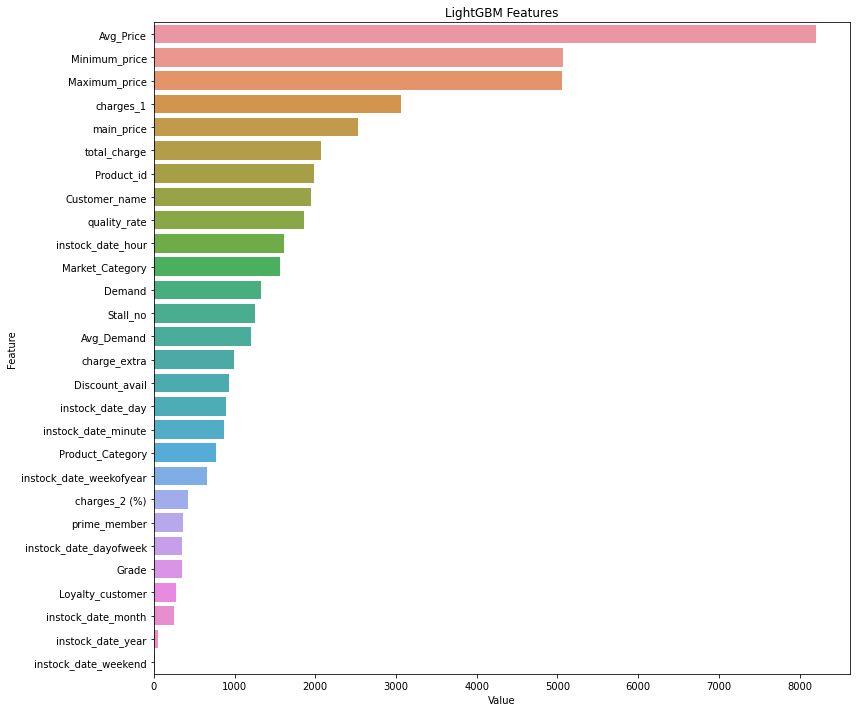

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.1637096293455074


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.23420601154079226


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.12126790878384781


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.1311375869774363


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.11228321467800882


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.15215528112740911


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.0807599555824804


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.31279889644665904


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.09495004155760352


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.17878980895464794


In [ ]:
np.mean(errlgb,0)

0.15820583349943926

In [ ]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))
lgbm_final

array([3209.49018639, 1861.56080241, 9753.61974801, ..., 5996.34196103,
       3448.17751978, 1054.47946981])

In [ ]:
submission = pd.DataFrame({
        "Product_id": re,
        "Selling_Price": lgbm_final
    })
submission.to_csv('./r22.csv', index=False)
print(submission)

            Product_id  Selling_Price
0     SCHE4YSTDVPVZVXW    3209.490186
1     ACCEGCATKHNRXUHW    1861.560802
2     NKCE6GJ5XVJDXNNZ    9753.619748
3     NKCEB8BK3ZXDHDHM    9354.424627
4     TOPEFDXSAHRNPF94    5450.062733
...                ...            ...
3425  BBAE9K7BXFUTDNBK    3982.539259
3426  RTRDYPA4PJHCJCGF    8917.938168
3427  TUNE8FWQBS7TVVT7    5996.341961
3428  NKCEGMUABCRGUZPE    3448.177520
3429  RNGE7M92KAQWUBCS    1054.479470

[3430 rows x 2 columns]


# gb

In [ ]:
X = train_df.drop(labels=['Selling_Price'], axis=1)
y = train_df['Selling_Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.1, n_estimators=500, random_state=101, subsample=0.8,min_samples_split=100,min_samples_leaf=50,max_depth=8,max_features='sqrt')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred))))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6345           0.0945            4.58s
         2           0.5762           0.0573            4.32s
         3           0.4758           0.0840            4.28s
         4           0.4358           0.0507            4.22s
         5           0.3688           0.0685            4.20s
         6           0.3174           0.0572            4.20s
         7           0.2939           0.0264            4.13s
         8           0.2476           0.0385            4.10s
         9           0.2172           0.0372            4.13s
        10           0.1973           0.0250            4.12s
        20           0.0659           0.0074            3.84s
        30           0.0399           0.0010            3.79s
        40           0.0313           0.0002            3.70s
        50           0.0157           0.0002            3.67s
        60           0.0156          -0.0000            3.61s
       

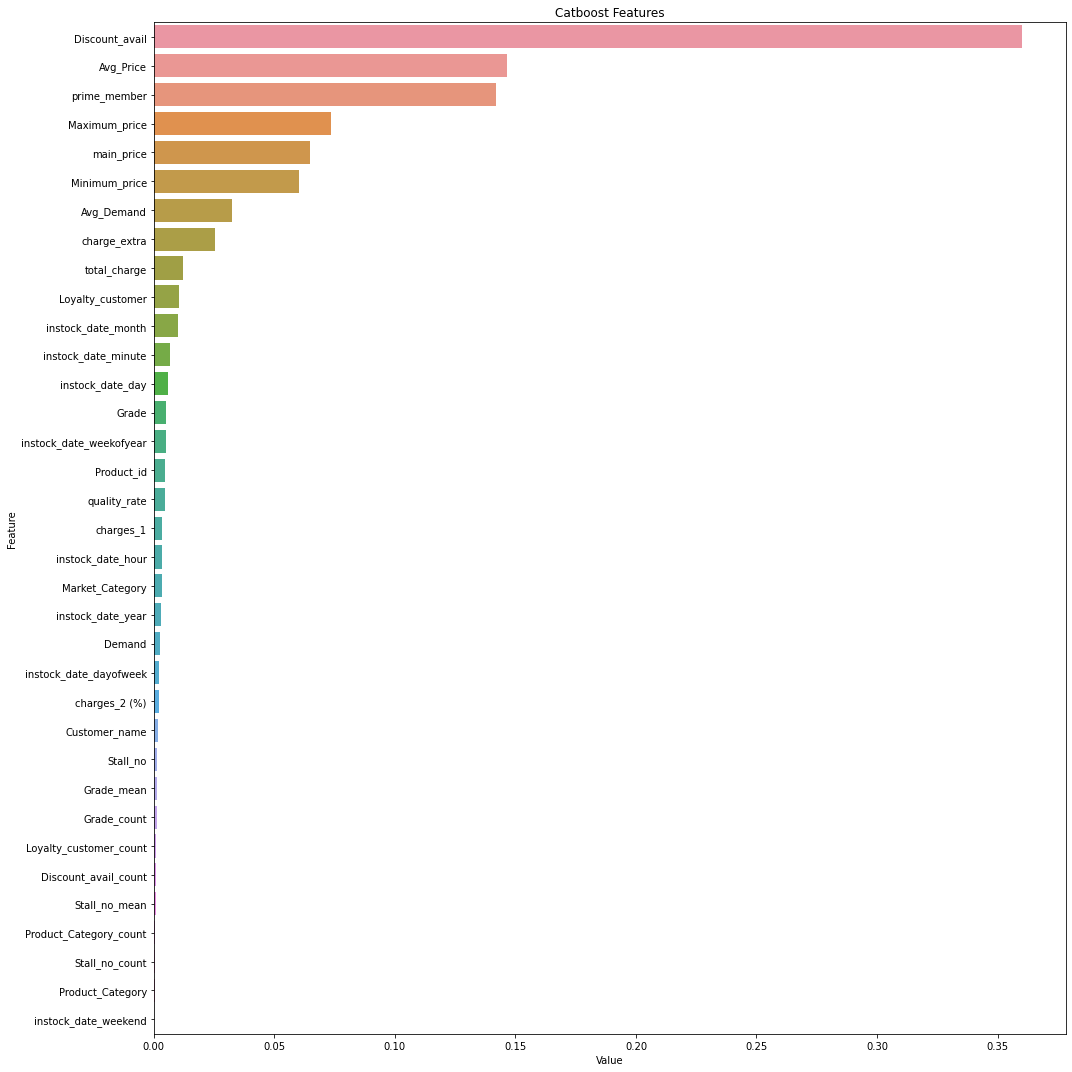

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [ ]:
Xtest = test_df

In [ ]:

from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    #gb = GradientBoostingRegressor(learning_rate=0.3, n_estimators=1000, random_state=42, subsample=0.8)
    gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, random_state=101, subsample=0.8,min_samples_split=100,min_samples_leaf=50,max_depth=8,max_features='sqrt')
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred))))

    errgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred))))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

RMSLE LGBM:  0.11933756198077228
RMSLE LGBM:  0.14020514021167954
RMSLE LGBM:  0.10801805211174526
RMSLE LGBM:  0.23492009956651766


In [ ]:
np.mean(errgb,0)

0.15062021346767868

In [ ]:
gb_fib = np.expm1(np.mean(y_pred_totgb,0))
gb_fib

array([ 3150.97135777,  1831.77488   , 10243.50900253, ...,
        6148.0754939 ,  3351.81058395,  1194.87118625])

In [ ]:
submission = pd.DataFrame({
        "Product_id": re,
        "Selling_Price": (gb_fib*0.1+lgbm_final*0.9)
    })
submission.to_csv('./r005.csv', index=False)
print(submission)

            Product_id  Selling_Price
0     SCHE4YSTDVPVZVXW    3256.229493
1     ACCEGCATKHNRXUHW    1912.888452
2     NKCE6GJ5XVJDXNNZ   11250.955888
3     NKCEB8BK3ZXDHDHM    9344.256601
4     TOPEFDXSAHRNPF94    5349.148450
...                ...            ...
3425  BBAE9K7BXFUTDNBK    3987.143833
3426  RTRDYPA4PJHCJCGF    9305.177833
3427  TUNE8FWQBS7TVVT7    6080.273520
3428  NKCEGMUABCRGUZPE    3534.018031
3429  RNGE7M92KAQWUBCS    1041.741374

[3430 rows x 2 columns]


In [ ]:
from google.colab import files
files.download('r8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>